# Przewidywanie cukrzycy
### Zadanie polega na stworzeniu modelu do przewidywania czy dana osoba ma cukrzycę.
### Poniżej zostały przedstawione poszczególne etapy realizacji tego zadania - od wczytania danych po uczenie modelu i jego ocenę.
### Zbiór danych do zadania:
https://www.kaggle.com/uciml/pima-indians-diabetes-database
### Powodzenia! :)

# ------------------------------------------------------------------------------

### Wczytanie pakietów

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend import plotting

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

plt.rcParams["figure.figsize"] = (18,6) ## zmiana wielkości wykresów 
import warnings
warnings.filterwarnings("ignore")

## Eksploracja danych

#### Wczytanie zbioru danych

In [2]:
df = pd.read_csv('diabetes.csv')

#### Przegląd danych w zbiorze
##### Metody
1. head
2. info
3. shape
4. describe
5. value_counts

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Sprawdzenie udziału poszczególnych kategorii targetu

In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes = round(df.Outcome.value_counts()/df.shape[0],2)

In [11]:
diabetes = pd.DataFrame(diabetes)
diabetes

,Outcome
0,0.65
1,0.35


Text(0.5, 1.0, 'The Share in Target')

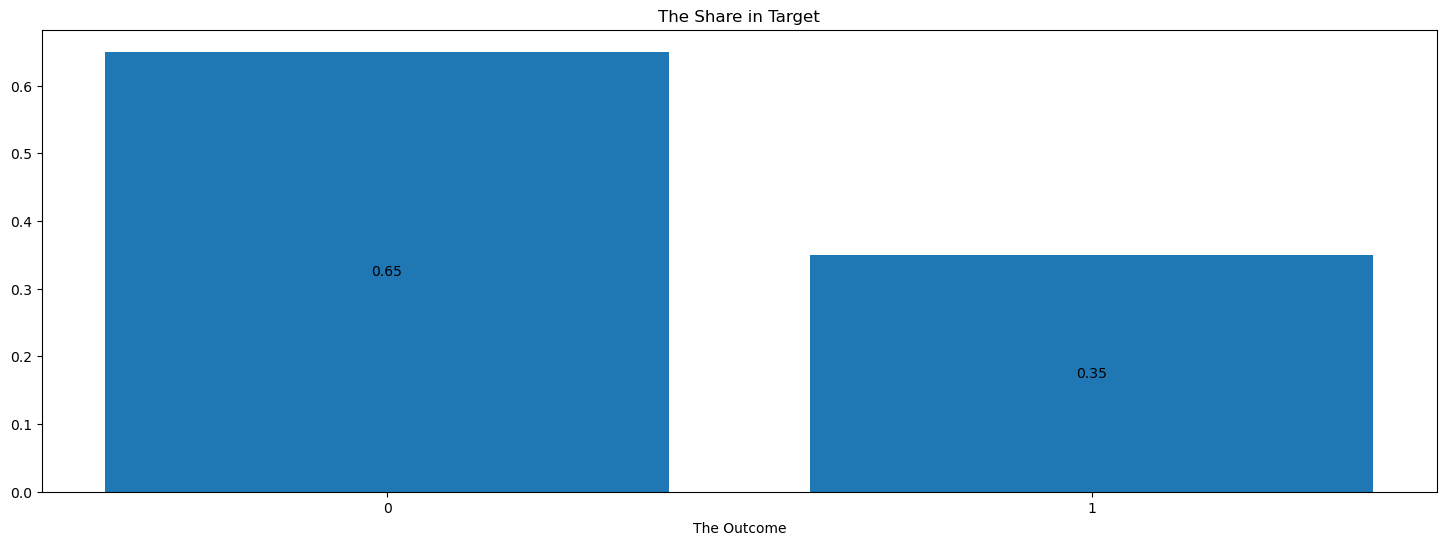

In [12]:
d = plt.bar(x=diabetes.index, height=diabetes['Outcome'])
plt.xticks(diabetes.index)
plt.bar_label(d, label_type='center')
plt.xlabel('The Outcome')
plt.title('The Share in Target')

#### Wykresy
1. Pudełko
2. Histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2458a094ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2458a0ab0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2458a0947f0>,
 'medians': [<matplotlib.lines.Line2D at 0x2458a0ab640>,
 'fliers': [<matplotlib.lines.Line2D at 0x2458a0ab910>,
 'means': []}

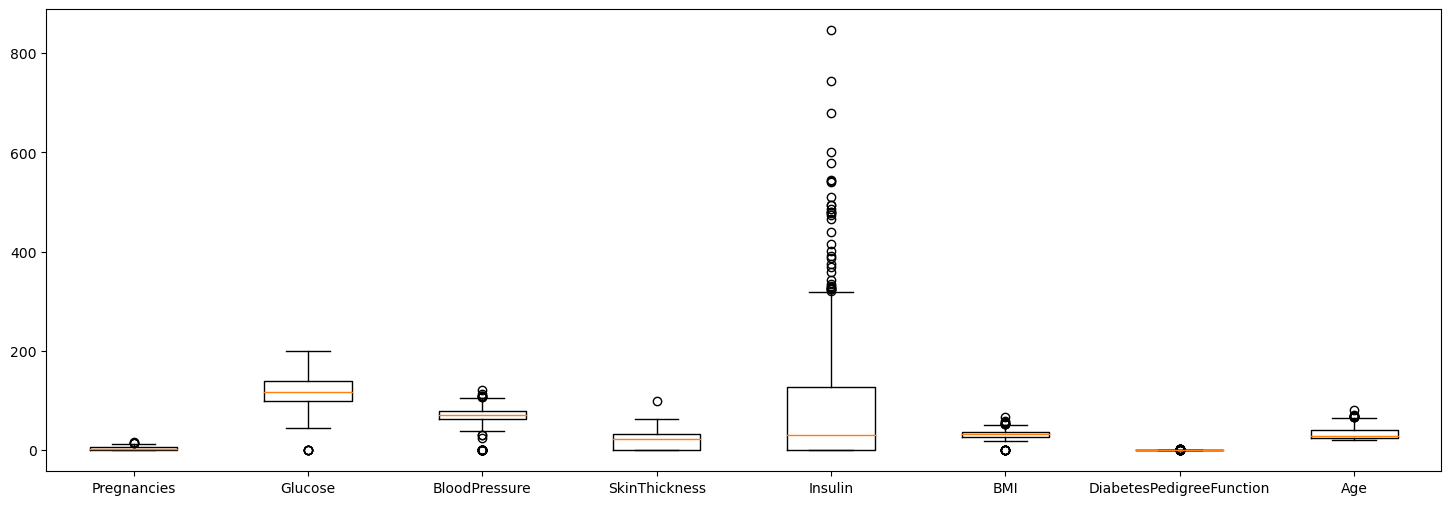

In [13]:
plt.boxplot(x=df[[ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']], labels=df.columns[:-1])

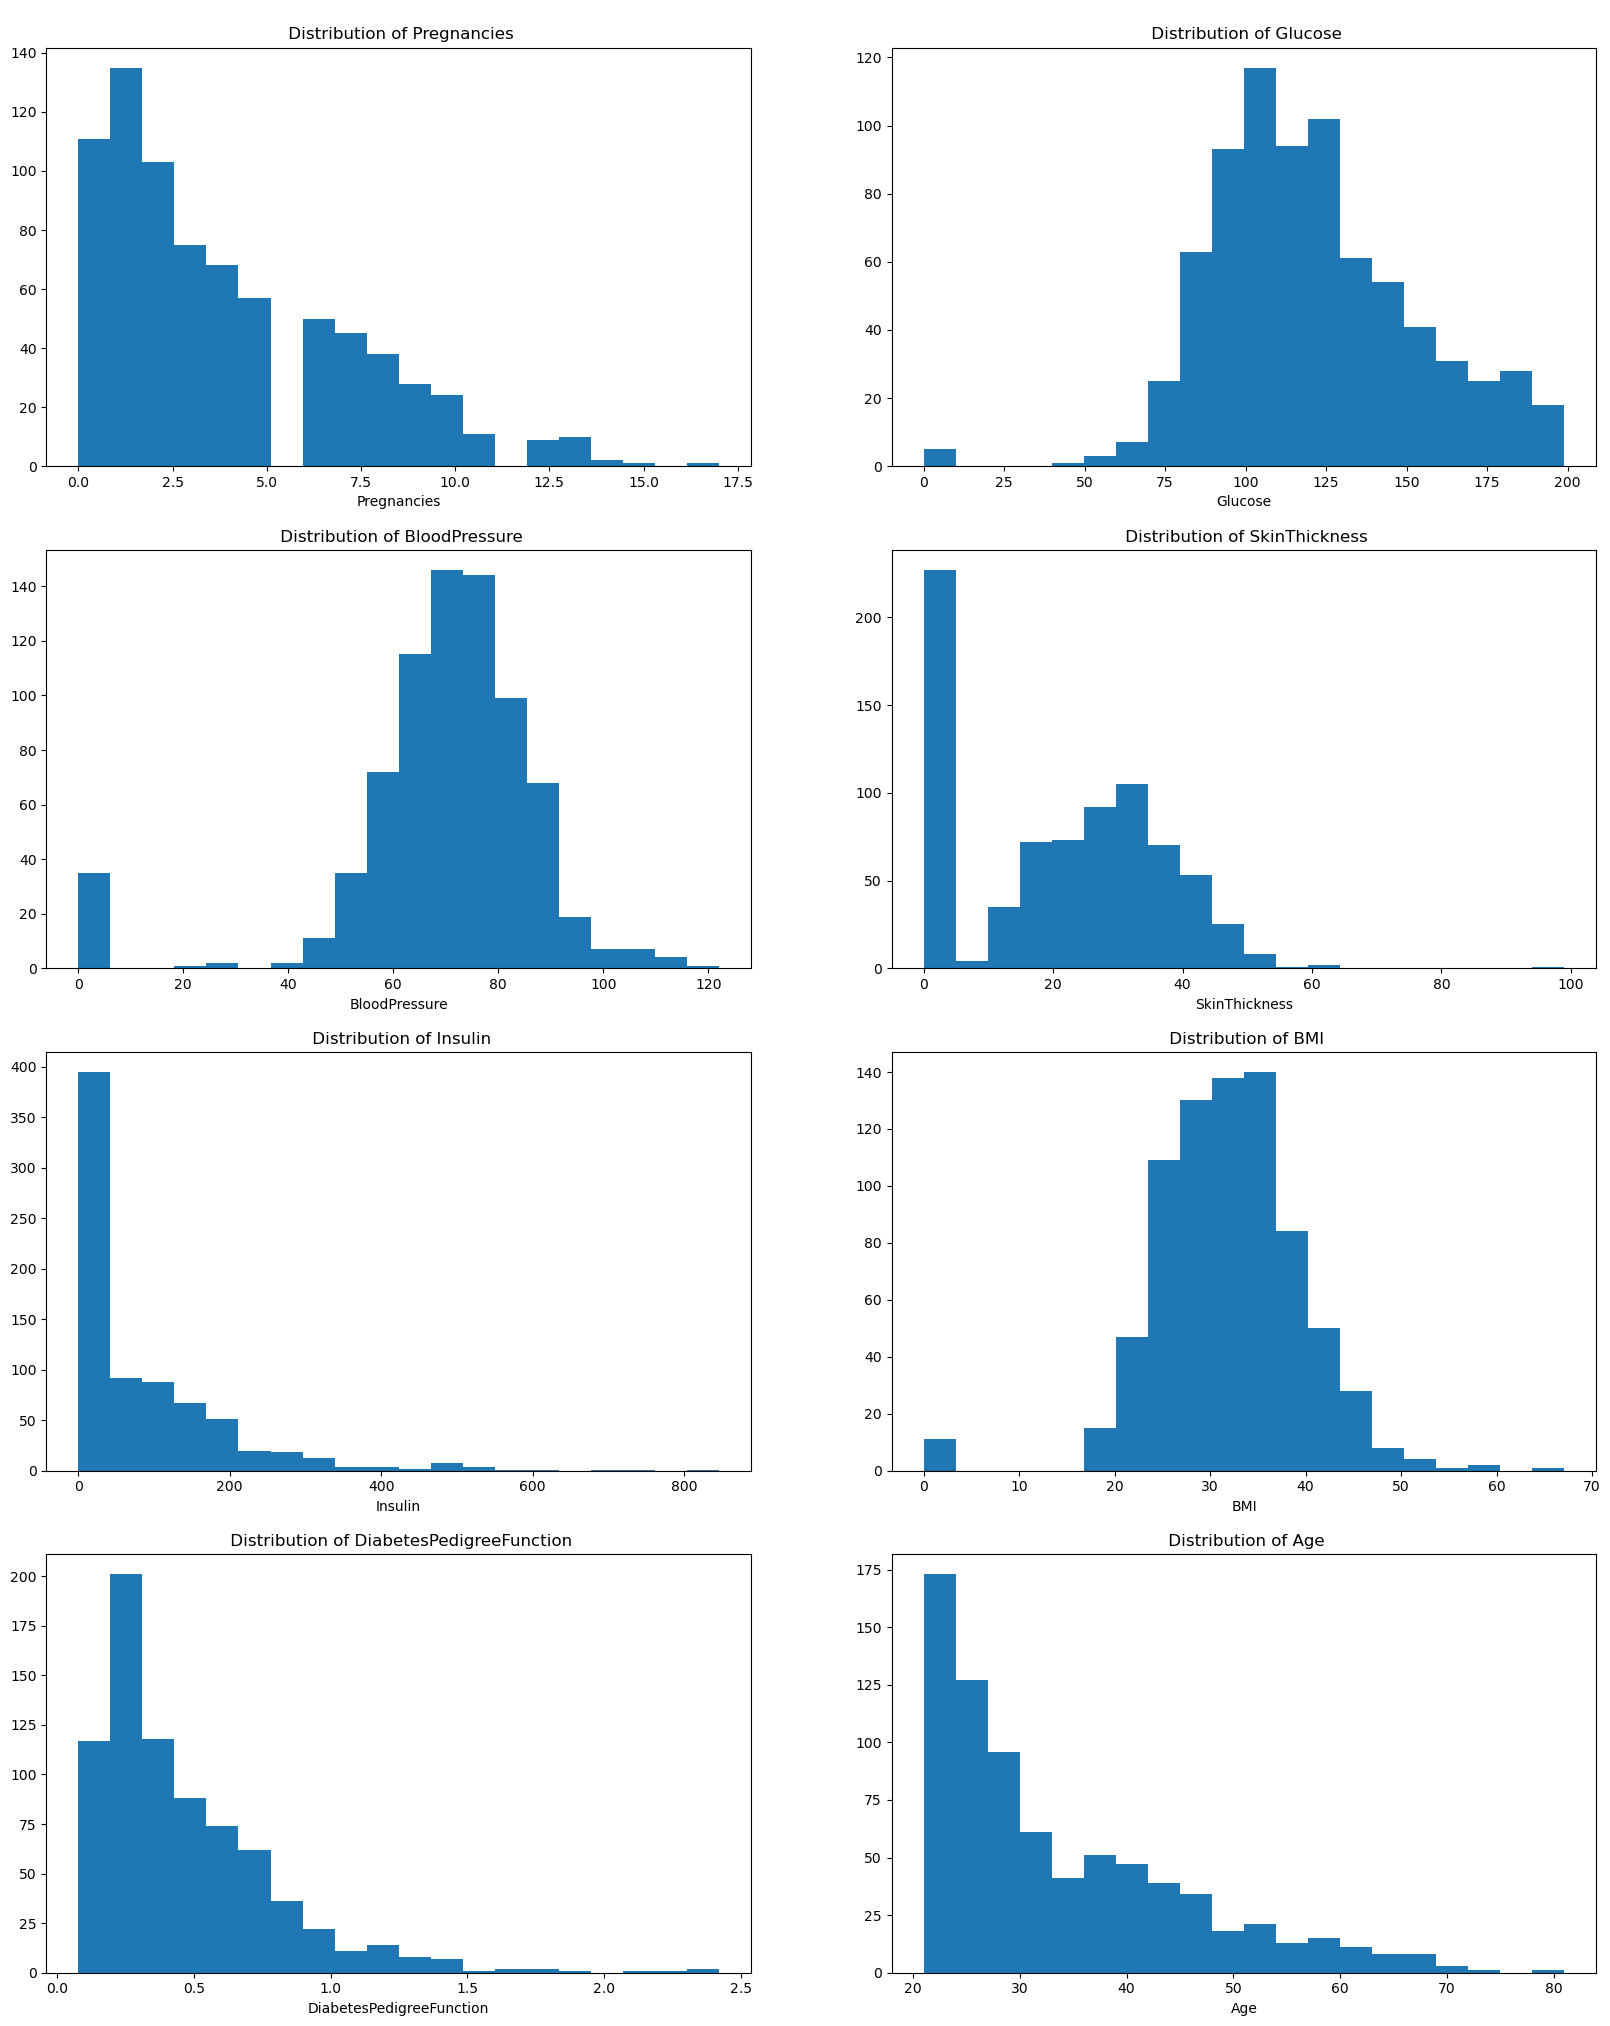

In [14]:
feature_cols = list(df.columns)[:-1]
target_var = df.columns[-1]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,25))
for i, col in enumerate(feature_cols):
    axes[i//2, i%2].hist(df[col],bins=20)
    axes[i//2, i%2].set_xlabel(col, size=10)
    axes[i//2, i%2].set_title('\n Distribution of ' + col, size=12)

#### Sprawdzenie braków danych

In [15]:
df.isna().max() 

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Zmienne wejściowe posiadają braki w danych:

In [16]:
feature_cols = list(df.columns)[1:-1]

for col in feature_cols:
    print('Ilość istotnych braków w pomiarach ', col,': ',(df[df[col] ==0].shape[0]))
    print('Udział istotnych braków w pomiarach' , col,': ', (round(df[df[col] ==0].shape[0]/df.shape[0],2)), '\n')

Ilość istotnych braków w pomiarach  Glucose :  5
Udział istotnych braków w pomiarach Glucose :  0.01 

Ilość istotnych braków w pomiarach  BloodPressure :  35
Udział istotnych braków w pomiarach BloodPressure :  0.05 

Ilość istotnych braków w pomiarach  SkinThickness :  227
Udział istotnych braków w pomiarach SkinThickness :  0.3 

Ilość istotnych braków w pomiarach  Insulin :  374
Udział istotnych braków w pomiarach Insulin :  0.49 

Ilość istotnych braków w pomiarach  BMI :  11
Udział istotnych braków w pomiarach BMI :  0.01 

Ilość istotnych braków w pomiarach  DiabetesPedigreeFunction :  0
Udział istotnych braków w pomiarach DiabetesPedigreeFunction :  0.0 

Ilość istotnych braków w pomiarach  Age :  0
Udział istotnych braków w pomiarach Age :  0.0 



In [17]:
#Zamieniamy braki w pomiarach na NaN
feature_cols_miss = list(df.columns)[1:-3] #tylko kolumny z brakami w pomiarach
for col in feature_cols_miss:
    df[col] = np.where(df[col] == 0, np.NaN, df[col])

In [18]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Imputacja brakujących zmiennych: 
- dla zmiennych z małym udziałem braków wartością imputowaną będzie średnia:
- dla zmiennej SkinThickness w zależności od zmiennej BMI, 
- dla Insuliny z użyciem mediany w odniesieniu do zmiennej DiabetesPedigreeFunction

In [19]:
df["Glucose"] = df["Glucose"].fillna(df.Glucose.mean())
df["BMI"] = df["BMI"].fillna(df.BMI.mean())
df["BloodPressure"] = df["BloodPressure"].fillna(df.BloodPressure.mean())

In [20]:
#dadamy nową kolumnę kategorii dla BMI:  
#BMI < 18.5 niedowaga, 
#BMI = > 18.5 and BMI =< 24.99 - waga prawidłowa, 
#BMI >= 25 nadwaga

In [21]:
def category_BMI(bmi):
        if bmi < 18.5: return 'niedowaga'
        if bmi >= 18.5 and bmi <= 24.99: return 'waga prawidłowa'
        else: return 'nadwaga'

In [22]:
df['catBMI']= df.BMI.apply(category_BMI)

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,catBMI
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,nadwaga
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,nadwaga
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,waga prawidłowa
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,nadwaga
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,nadwaga


In [24]:
SkinThickness_by_BMI = df.groupby('catBMI')['SkinThickness'].mean().round().reset_index()
SkinThickness_by_BMI

,catBMI,SkinThickness
0,nadwaga,31.0
1,niedowaga,17.0
2,waga prawidłowa,18.0


In [25]:
df['SkinThickness'] = np.where((df['catBMI'] == 'nadwaga') & (df['SkinThickness'].isna()), 31, df['SkinThickness'])

In [26]:
df['SkinThickness'] = np.where((df['catBMI'] == 'niedowaga') & (df['SkinThickness'].isna()), 17, df['SkinThickness'])

In [27]:
df['SkinThickness'] = np.where((df['catBMI'] == 'waga prawidłowa') & (df['SkinThickness'].isna()), 18, df['SkinThickness'])

In [28]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
catBMI                        0
dtype: int64

In [29]:
df["new_DiabetesPedigreeFunction"]=pd.qcut(df['DiabetesPedigreeFunction'], 5)

In [30]:
df.groupby("new_DiabetesPedigreeFunction")["Insulin"].median()

new_DiabetesPedigreeFunction
(0.077, 0.219]    120.0
(0.219, 0.303]    105.0
(0.303, 0.454]    122.5
(0.454, 0.687]    120.0
(0.687, 2.42]     152.0
Name: Insulin, dtype: float64

In [31]:
df["Insulin"] = df["Insulin"].fillna(df.groupby("new_DiabetesPedigreeFunction")["Insulin"].transform("median"))

In [32]:
df.isnull().sum()

Pregnancies                     0
Glucose                         0
BloodPressure                   0
SkinThickness                   0
Insulin                         0
BMI                             0
DiabetesPedigreeFunction        0
Age                             0
Outcome                         0
catBMI                          0
new_DiabetesPedigreeFunction    0
dtype: int64

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,catBMI,new_DiabetesPedigreeFunction
0,6,148.0,72.0,35.0,120.0,33.6,0.627,50,1,nadwaga,"(0.454, 0.687]"
1,1,85.0,66.0,29.0,122.5,26.6,0.351,31,0,nadwaga,"(0.303, 0.454]"
2,8,183.0,64.0,18.0,120.0,23.3,0.672,32,1,waga prawidłowa,"(0.454, 0.687]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,nadwaga,"(0.077, 0.219]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,nadwaga,"(0.687, 2.42]"


In [34]:
#usuwamy kolumny uwtorzone na potrzeby uzupełniania braków
df.drop(["catBMI", "new_DiabetesPedigreeFunction"], axis=1, inplace=True)

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,120.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,122.5,26.6,0.351,31,0
2,8,183.0,64.0,18.0,120.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### Korelacja

In [36]:
c_matrix = pd.DataFrame(df.corr())
c_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.094971,0.019339,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.206329,0.423225,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.190726,0.046205,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.094971,0.206329,0.190726,1.000000,0.148959,0.623317,0.109275,0.116889,0.249850
Insulin,0.019339,0.423225,0.046205,0.148959,1.000000,0.185196,0.183585,0.095303,0.209428
BMI,0.021565,0.230941,0.281268,0.623317,0.185196,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.109275,0.183585,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.116889,0.095303,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.249850,0.209428,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

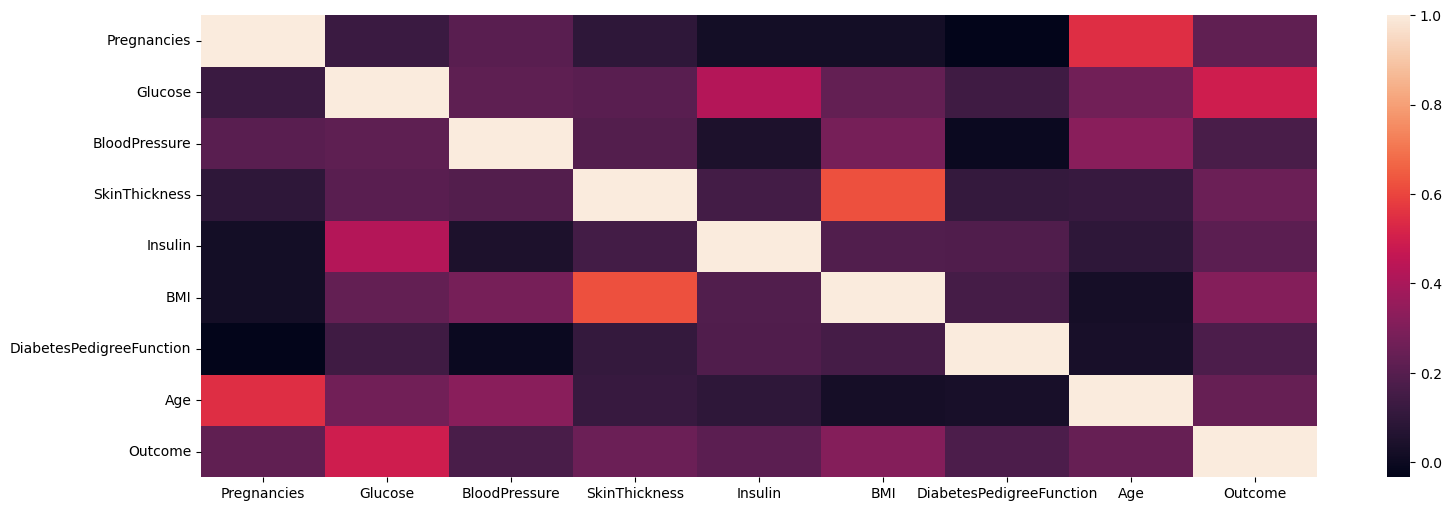

In [37]:
sns.heatmap(c_matrix)

#### Zbadanie zależności zmiennych na target

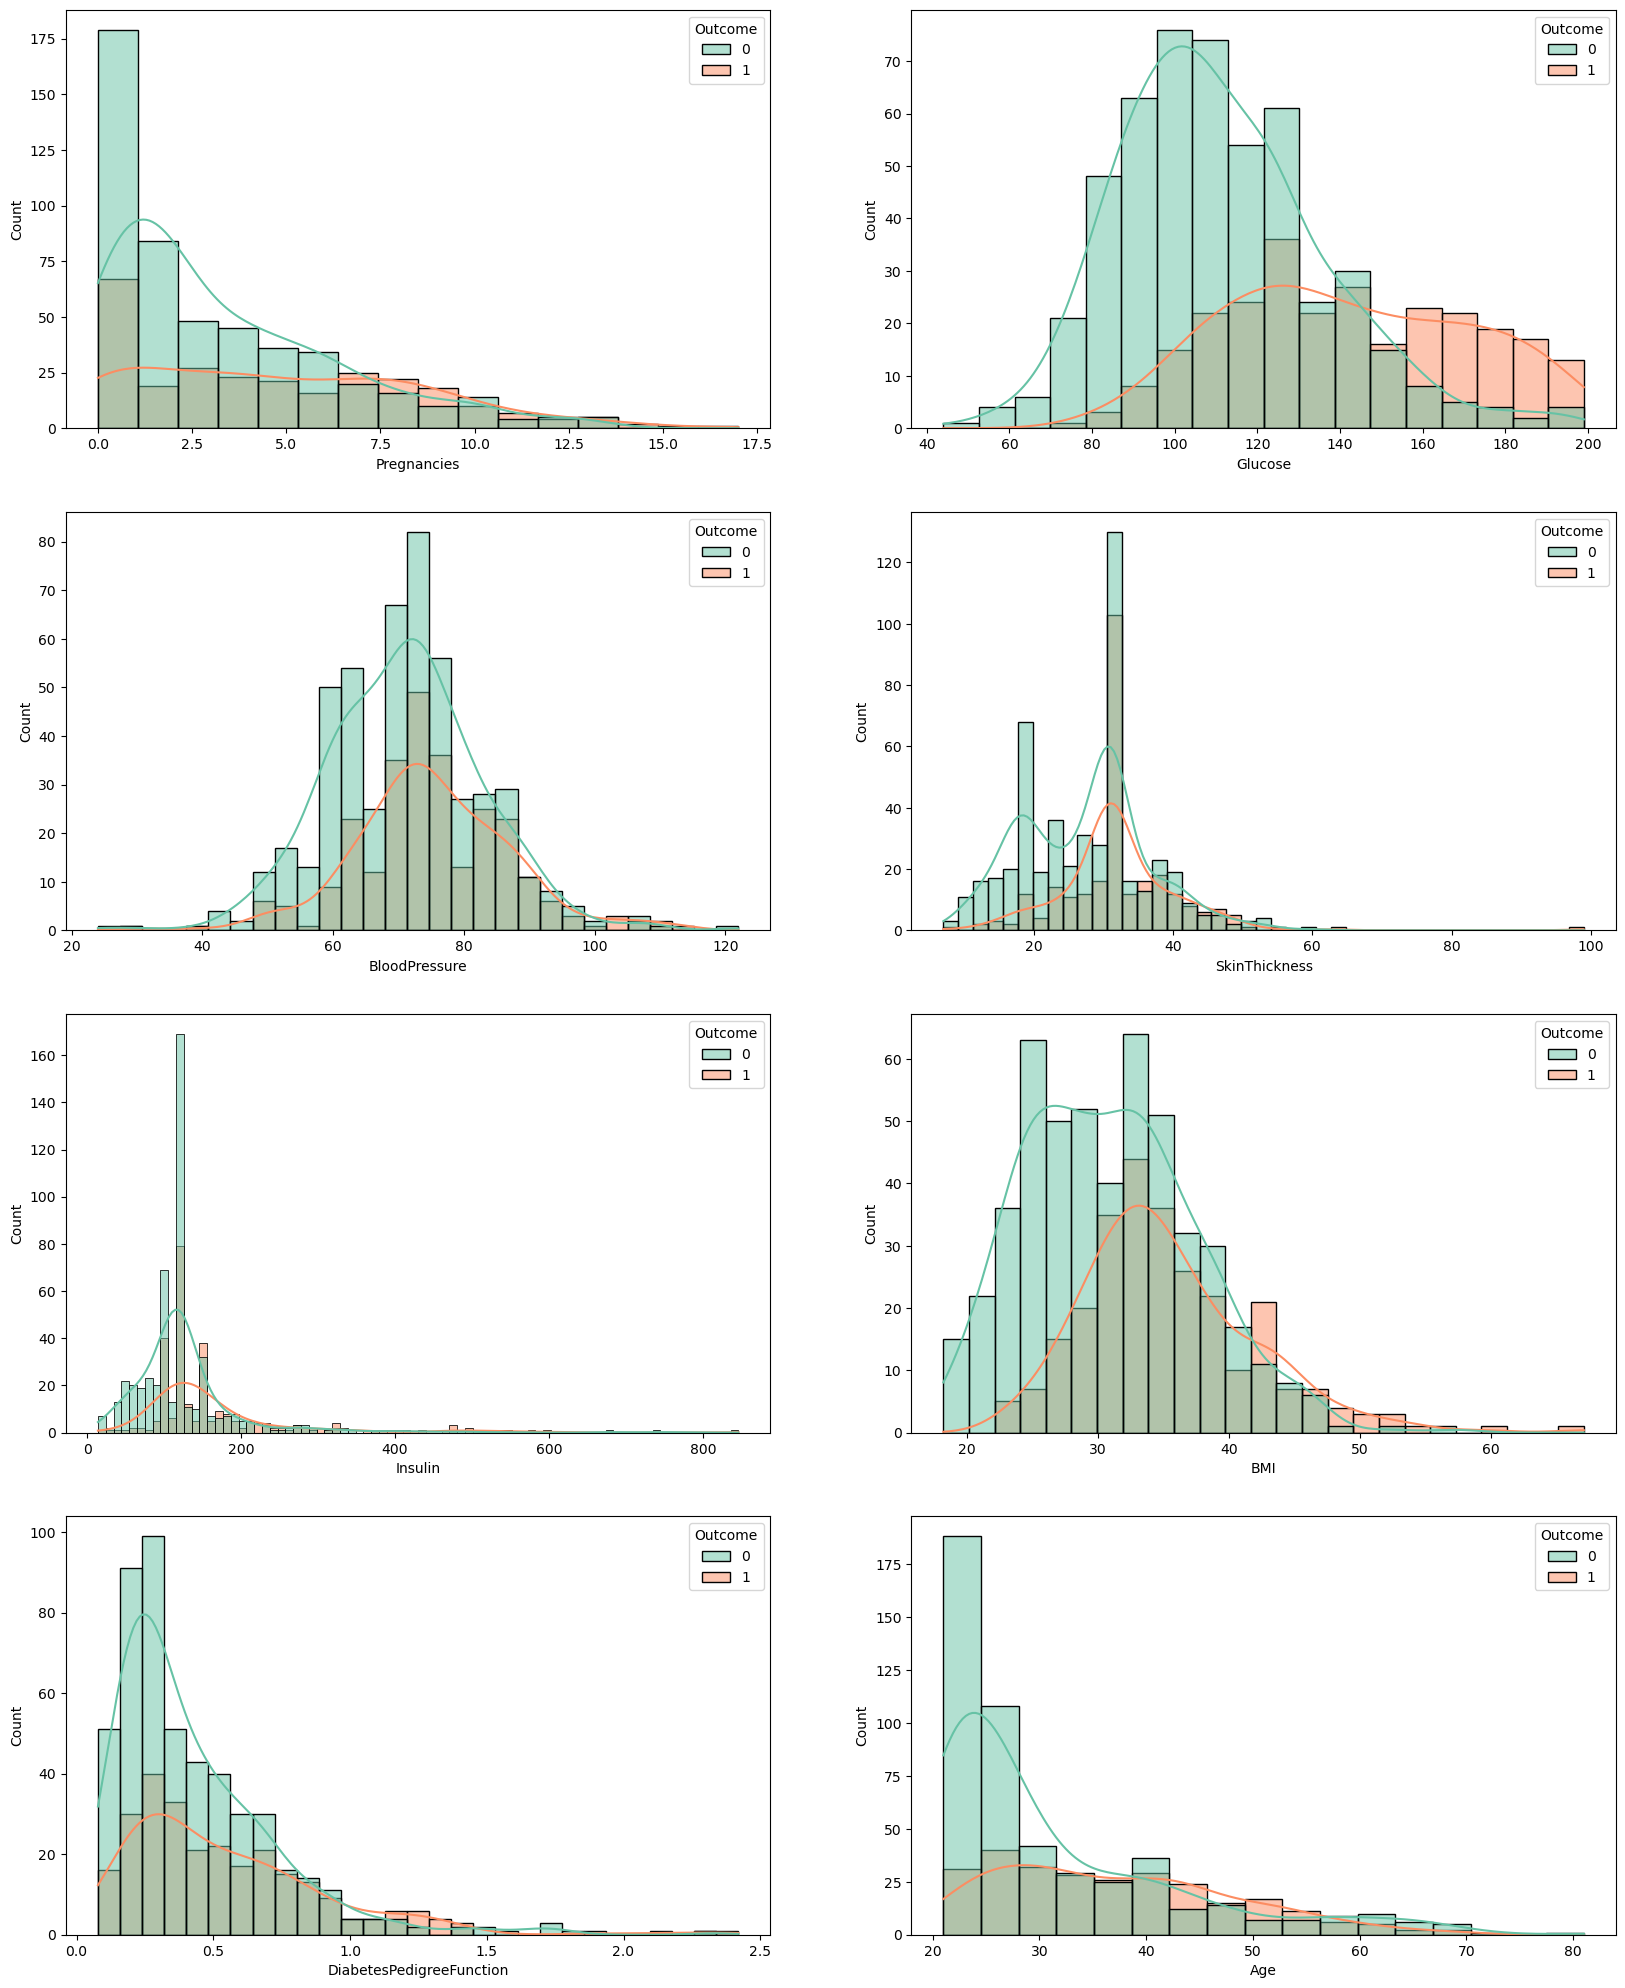

In [38]:
feature_cols = list(df.columns)[:-1]
target_var = df.columns[-1]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,25))

for i, col in enumerate(feature_cols):
    sns.histplot(data = df, x = col, ax = axes[i//2, i%2], hue = target_var, fill = True, kde=True, palette='Set2')

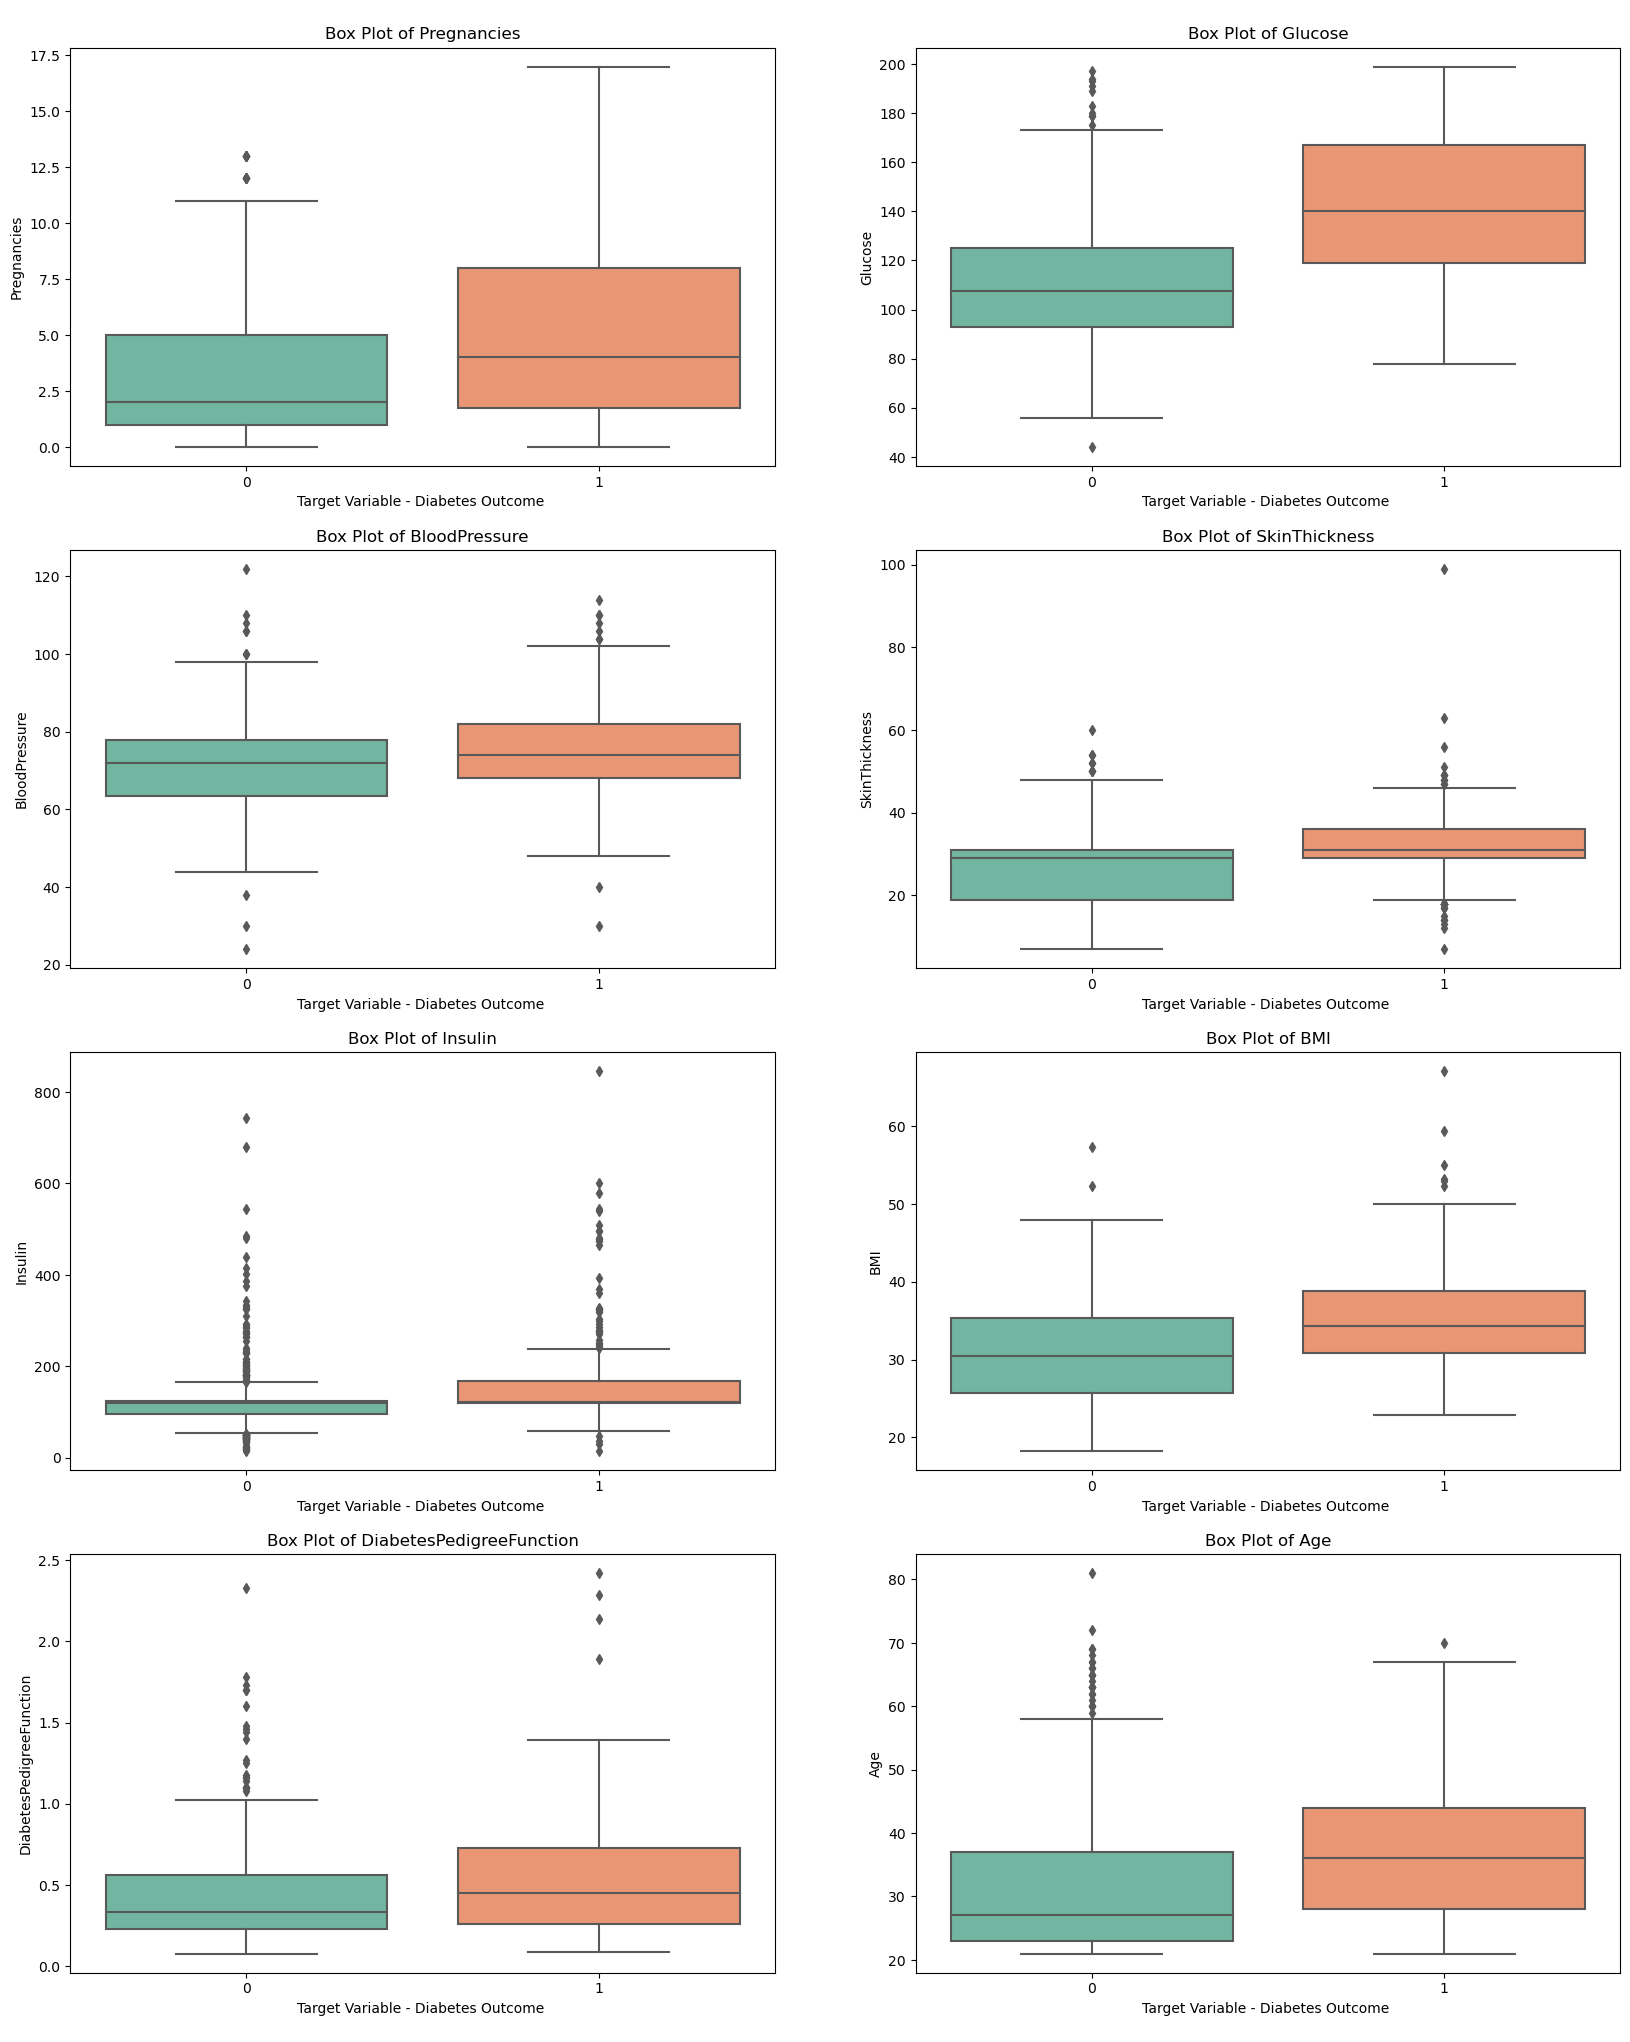

In [39]:
feature_cols = list(df.columns)[:-1]
target_var = df.columns[-1]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,25))

for i, col in enumerate(feature_cols):
    sns.boxplot(x=target_var, y=col, data=df, ax=axes[i//2, i%2], palette='Set2')
    axes[i//2, i%2].set_xlabel('Target Variable - Diabetes Outcome \n', size=10)
    axes[i//2, i%2].set_ylabel(col, size=10)
    axes[i//2, i%2].set_title('\nBox Plot of ' + col, size=12)

In [40]:
#udział ilości ciąż w występowaniu cukrzycy
preg_to_plot = df[['Pregnancies','Outcome']].groupby('Pregnancies').sum().reset_index()

In [41]:
preg_to_plot['share'] = round(preg_to_plot['Outcome']/df.shape[0],2)

In [42]:
preg_to_plot.head()

,Pregnancies,Outcome,share
0,0,38,0.05
1,1,29,0.04
2,2,19,0.02
3,3,27,0.04
4,4,23,0.03


Text(0.5, 1.0, 'The Pregnancy Share in Diabetes')

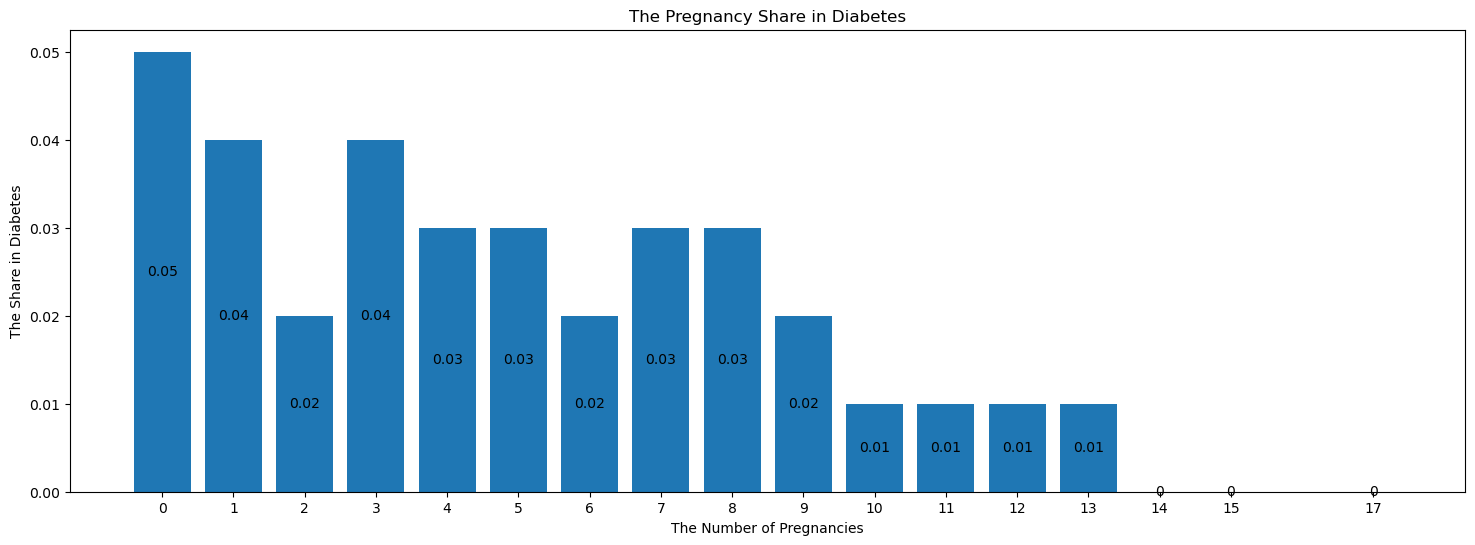

In [43]:
p = plt.bar(x=preg_to_plot['Pregnancies'], height=preg_to_plot['share'])
plt.xticks(preg_to_plot['Pregnancies'])
plt.bar_label(p, label_type='center')
plt.xlabel('The Number of Pregnancies')
plt.ylabel('The Share in Diabetes')
plt.title('The Pregnancy Share in Diabetes')

In [44]:
#analiza zmiennej dot. poziomu glukozy i jej wpływ na wystapienie cukrzycy
glu_to_outcome = df[['Glucose','Outcome']].groupby('Glucose').sum().reset_index()

In [45]:
#https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296
#A normal blood glucose level is lower than 140 mg/dL
#A blood glucose level between 140 and 199 mg/dL is considered impaired glucose tolerance, or prediabetes
#A blood glucose level of 200 mg/dL or higher may indicate diabetes.

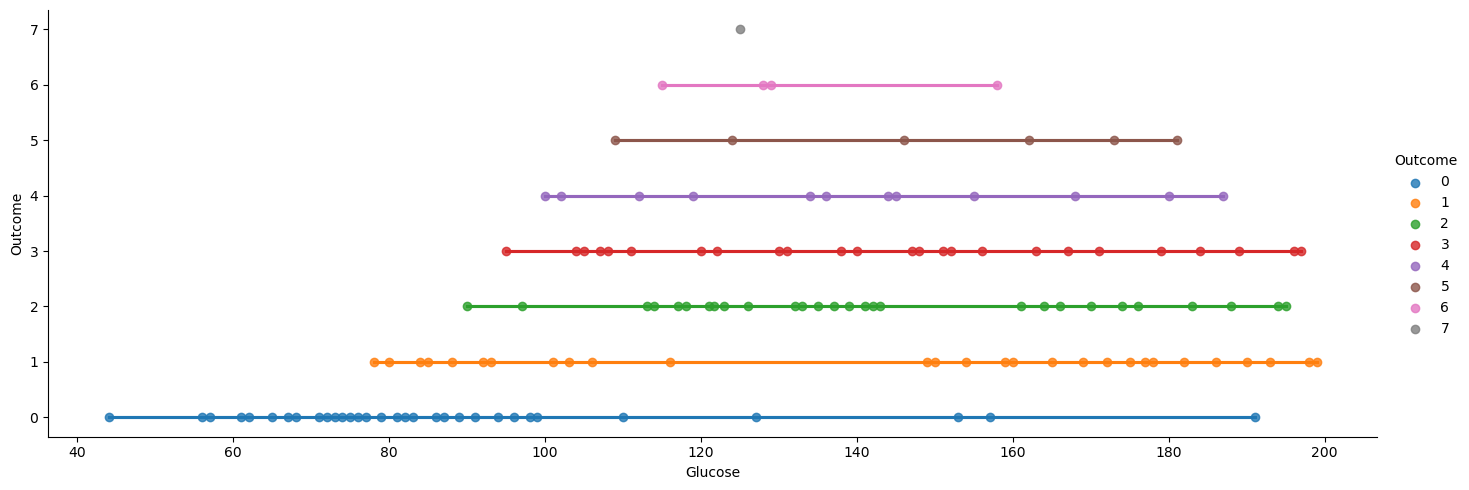

In [46]:
sns.lmplot(x="Glucose", y="Outcome", data=glu_to_outcome, fit_reg=True, hue="Outcome",truncate=True, height=5, aspect=2.8)

In [47]:
bl_to_outcome = df[['BloodPressure','Outcome']].groupby('BloodPressure').sum().reset_index()

In [48]:
bl_to_outcome.sort_values(by="Outcome", ascending=False).head()

,BloodPressure,Outcome
20,70.000000,23
25,76.000000,18
23,74.000000,17
26,78.000000,17
22,72.405184,16


In [49]:
bl_to_plot=bl_to_outcome.sort_values(by="Outcome", ascending=False)
bl_to_plot['share'] = round(bl_to_plot['Outcome']/df.shape[0],2)
bl_to_plot.head()

,BloodPressure,Outcome,share
20,70.000000,23,0.03
25,76.000000,18,0.02
23,74.000000,17,0.02
26,78.000000,17,0.02
22,72.405184,16,0.02


Text(0, 0.5, 'The Cases of Diabetes')

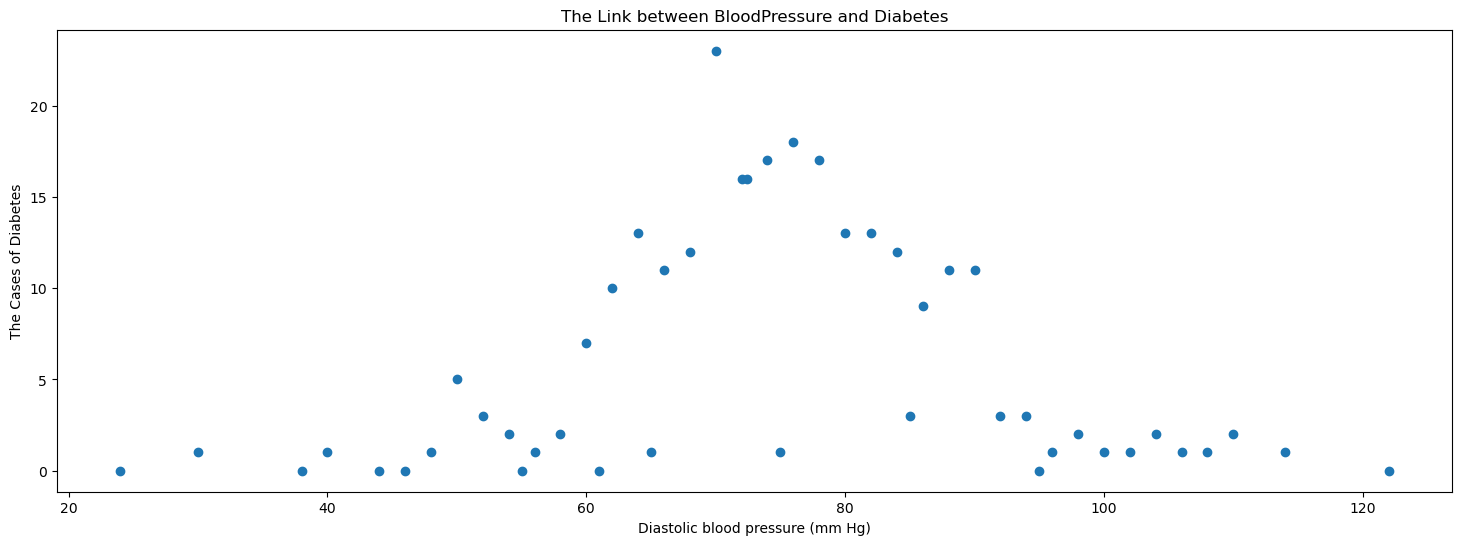

In [50]:
plt.plot("BloodPressure", "Outcome", data=bl_to_outcome,linestyle='none', marker='o')
plt.title('The Link between BloodPressure and Diabetes', fontsize=12)
plt.xlabel('Diastolic blood pressure (mm Hg)',fontsize=10)
plt.ylabel('The Cases of Diabetes',fontsize=10)

In [51]:
st_to_outcome = df[['SkinThickness','Outcome']].groupby('SkinThickness').sum().reset_index()

In [52]:
st_to_outcome.sort_values(by='Outcome', ascending=False).head()

,SkinThickness,Outcome
23,31.0,89
24,32.0,14
25,33.0,9
10,18.0,9
22,30.0,9


Text(0, 0.5, 'The Cases of Diabetes')

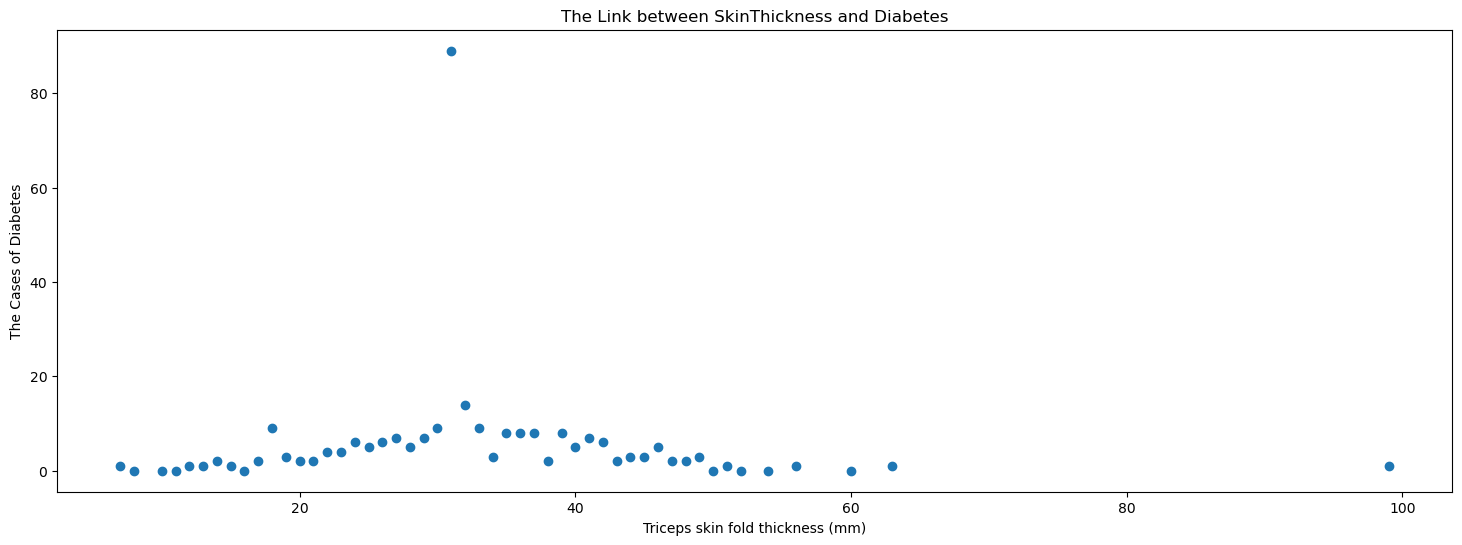

In [53]:
plt.plot("SkinThickness", "Outcome", data=st_to_outcome,linestyle='none', marker='o')
plt.title('The Link between SkinThickness and Diabetes', fontsize=12)
plt.xlabel('Triceps skin fold thickness (mm)',fontsize=10)
plt.ylabel('The Cases of Diabetes',fontsize=10)

In [54]:
ins_to_outcome = df[['Insulin','Outcome']].groupby('Insulin').sum().reset_index().sort_values(by='Outcome',                                                                                           ascending=False)
ins_to_outcome.head()

,Insulin,Outcome
75,120.0,50
66,105.0,35
93,152.0,30
77,122.5,26
83,130.0,6


Text(0, 0.5, 'The Cases of Diabetes')

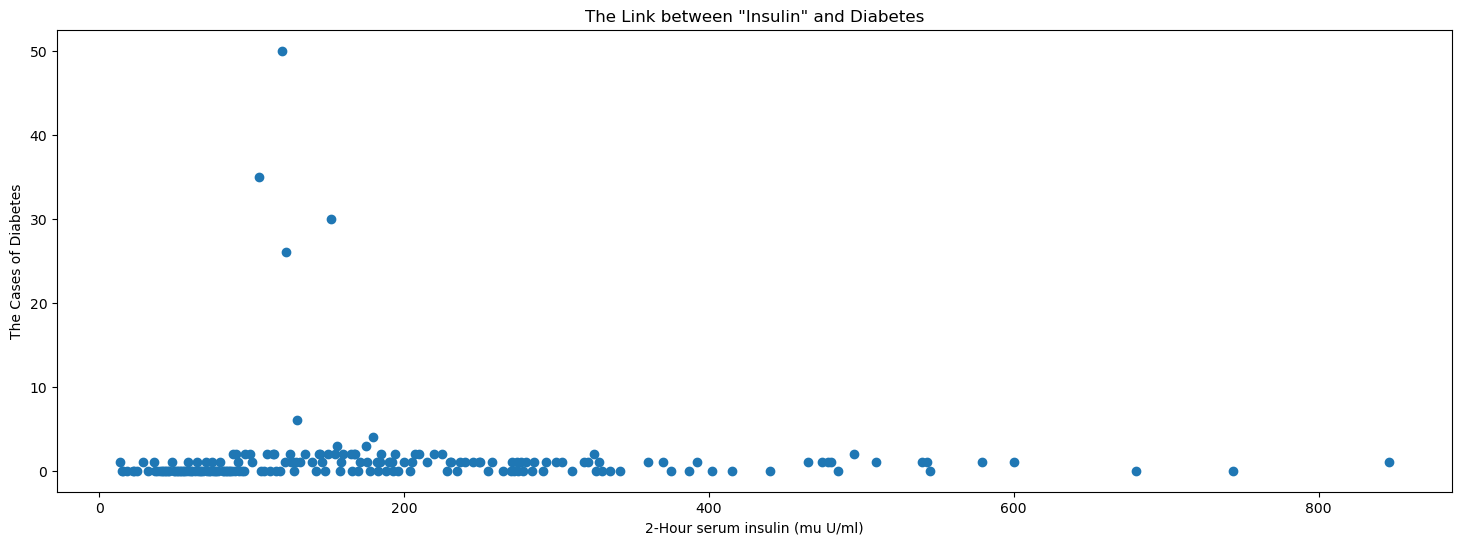

In [55]:
plt.plot("Insulin", "Outcome", data=ins_to_outcome,linestyle='none', marker='o')
plt.title('The Link between "Insulin" and Diabetes', fontsize=12)
plt.xlabel('2-Hour serum insulin (mu U/ml)',fontsize=10)
plt.ylabel('The Cases of Diabetes',fontsize=10)

In [56]:
bmi_to_outcome = df[['BMI','Outcome']].groupby('BMI').sum().reset_index().sort_values(by='Outcome',ascending=False)
bmi_to_outcome.head()

,BMI,Outcome
118,32.9,8
106,31.6,7
121,33.3,6
98,30.5,5
108,32.0,5


Text(0, 0.5, 'The Cases of Diabetes')

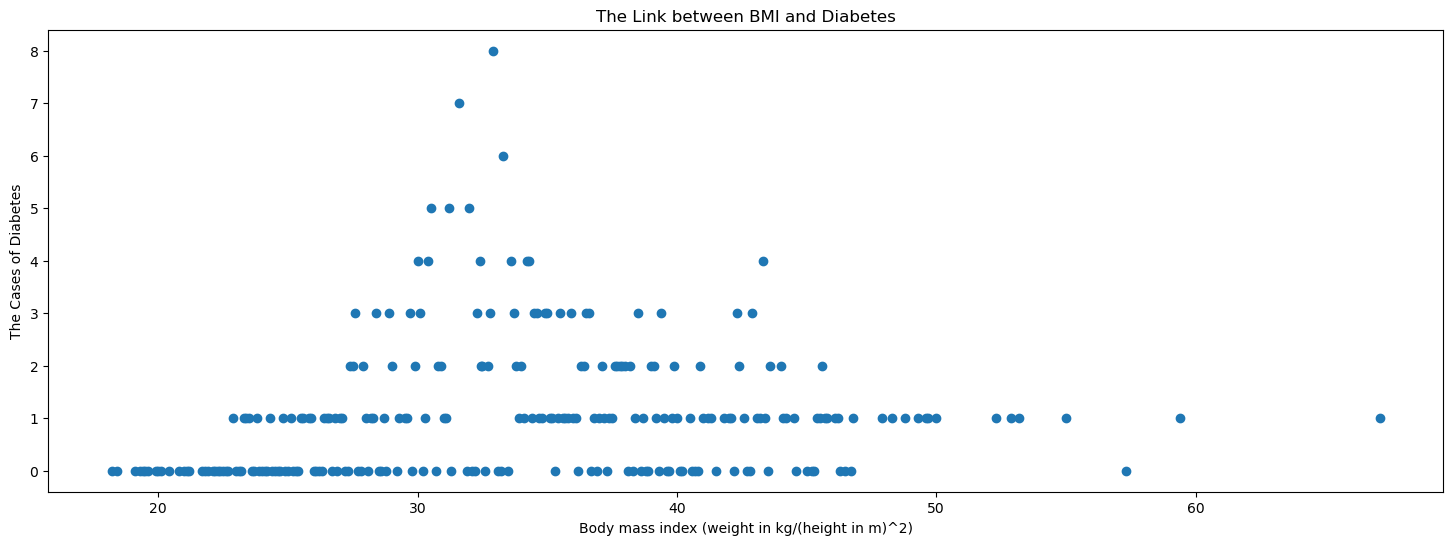

In [57]:
plt.plot("BMI", "Outcome", data=bmi_to_outcome,linestyle='none', marker='o')
plt.title('The Link between BMI and Diabetes', fontsize=12)
plt.xlabel('Body mass index (weight in kg/(height in m)^2)',fontsize=10)
plt.ylabel('The Cases of Diabetes',fontsize=10)

In [58]:
dpf_to_outcome = df[['DiabetesPedigreeFunction','Outcome']].groupby('DiabetesPedigreeFunction').sum().reset_index().sort_values(by='Outcome',ascending=False)
dpf_to_outcome.head()

,DiabetesPedigreeFunction,Outcome
123,0.254,4
127,0.258,3
229,0.402,2
111,0.240,2
29,0.141,2


Text(0, 0.5, 'The Cases of Diabetes')

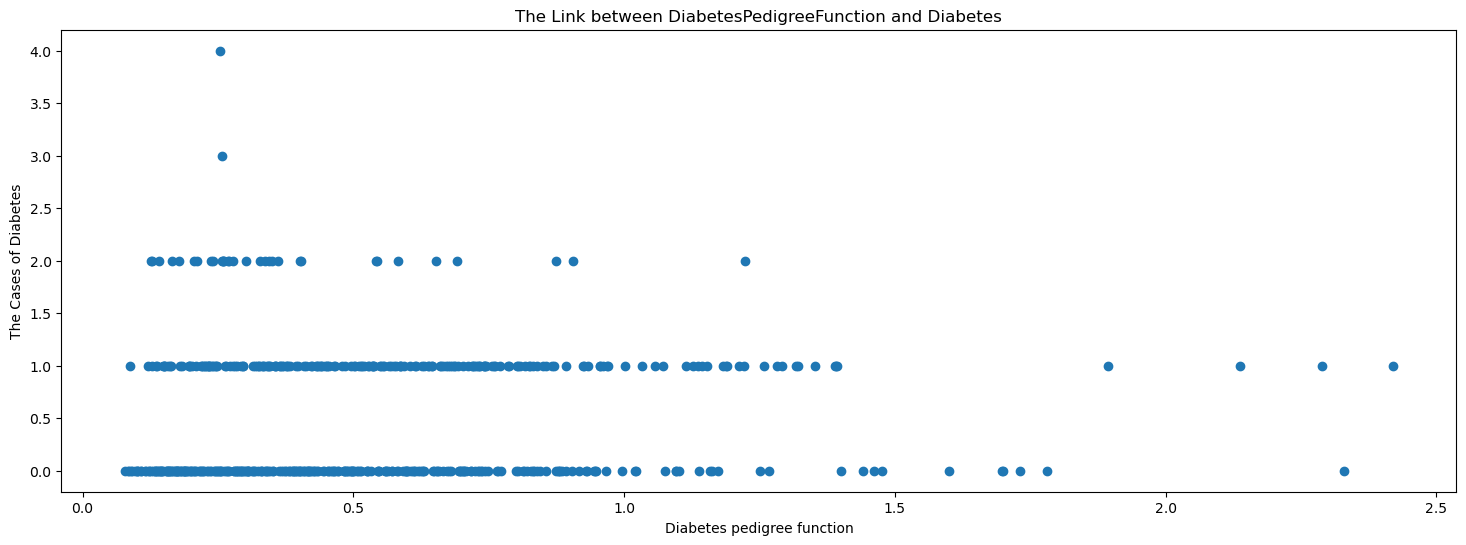

In [59]:
plt.plot("DiabetesPedigreeFunction", "Outcome", data=dpf_to_outcome, linestyle='none', marker='o')
plt.title('The Link between DiabetesPedigreeFunction and Diabetes', fontsize=12)
plt.xlabel('Diabetes pedigree function',fontsize=10)
plt.ylabel('The Cases of Diabetes',fontsize=10)

In [60]:
age_to_outcome = df[['Age','Outcome']].groupby('Age').sum().reset_index().sort_values(by='Outcome',ascending=False)
age_to_outcome.head()

,Age,Outcome
4,25,14
10,31,13
20,41,13
8,29,13
22,43,11


Text(0, 0.5, 'The Cases of Diabetes')

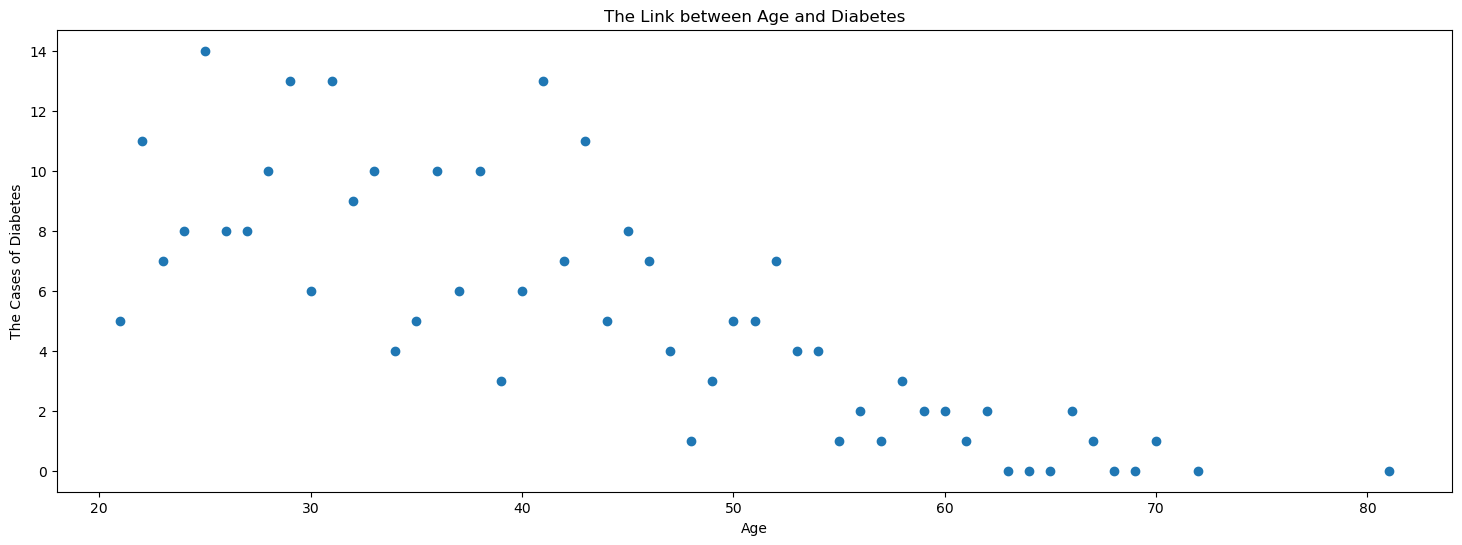

In [61]:
plt.plot("Age", "Outcome", data=age_to_outcome, linestyle='none', marker='o')
plt.title('The Link between Age and Diabetes', fontsize=12)
plt.xlabel('Age',fontsize=10)
plt.ylabel('The Cases of Diabetes',fontsize=10)

## Feature Engineering i przygotowanie zbiorów

#### Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych na target

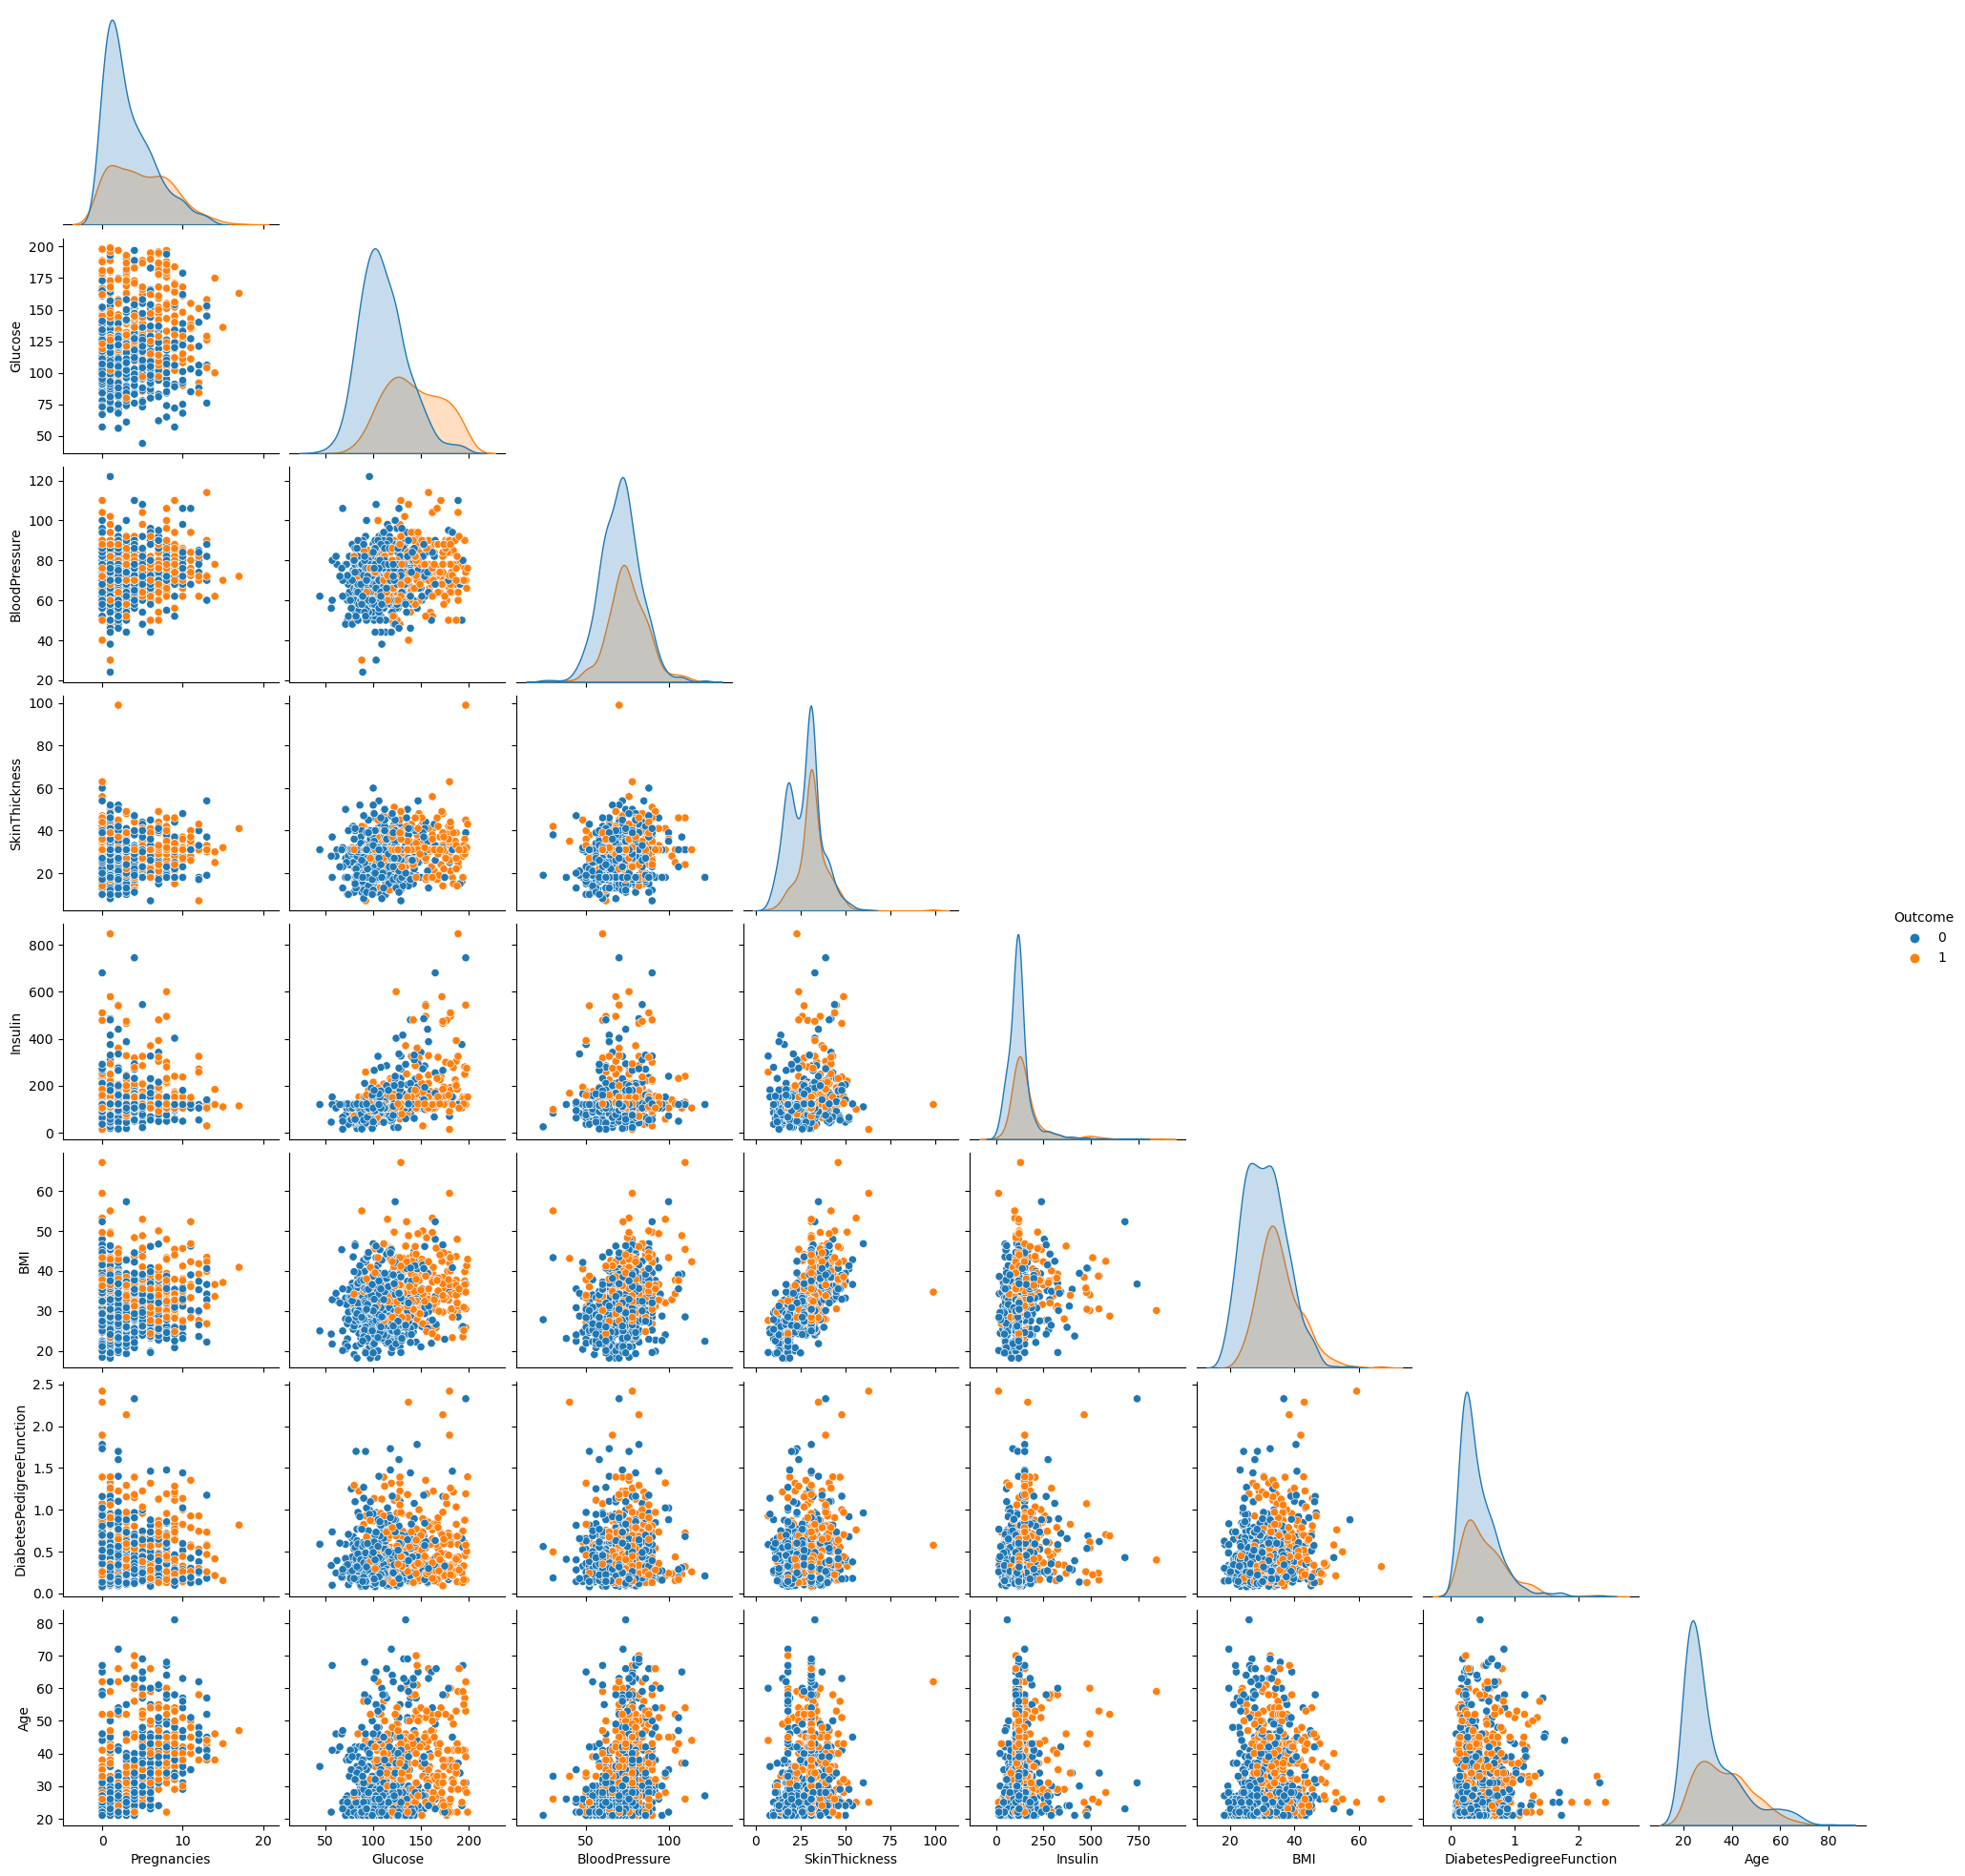

In [62]:
#związek między zmiennymi
sns.pairplot(df, hue='Outcome',corner=True)

In [86]:
c_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.094971,0.019339,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.206329,0.423225,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.190726,0.046205,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.094971,0.206329,0.190726,1.000000,0.148959,0.623317,0.109275,0.116889,0.249850
Insulin,0.019339,0.423225,0.046205,0.148959,1.000000,0.185196,0.183585,0.095303,0.209428
BMI,0.021565,0.230941,0.281268,0.623317,0.185196,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.109275,0.183585,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.116889,0.095303,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.249850,0.209428,0.311924,0.173844,0.238356,1.000000


In [145]:
#typowanie predyktorów na podstawie korelacji
high_corr= c_matrix.loc['Outcome'][(c_matrix.loc['Outcome'] > 0.2) & (c_matrix.loc['Outcome'] < 1)].sort_values(ascending=False)
print(high_corr)
print(high_corr.index.tolist())

Glucose          0.492928
BMI              0.311924
SkinThickness    0.249850
Age              0.238356
Pregnancies      0.221898
Insulin          0.209428
Name: Outcome, dtype: float64
['Glucose', 'BMI', 'SkinThickness', 'Age', 'Pregnancies', 'Insulin']


# Budowa modelu

#### Podział zbioru na treningowy i testowy

In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,120.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,122.5,26.6,0.351,31,0
2,8,183.0,64.0,18.0,120.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [172]:
X = df[['Glucose', 'BMI', 'SkinThickness', 'Age', 'Pregnancies']]
y = df['Outcome']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

#### Analiza głównych składowych (PCA)

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Estymacja modelu klasyfikacyjnego - drzewa decyzyjne

Wyestymuj dwa modele - jeden na wytypowanych przez Ciebie danych, a drugi na PCA.

In [175]:
tree_clf = DecisionTreeClassifier(random_state=0, max_depth=3,criterion='gini') 
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'X[0] <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]'),
 Text(0.25, 0.625, 'X[3] <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]'),
 Text(0.125, 0.375, 'X[1] <= 45.4\ngini = 0.155\nsamples = 271\nvalue = [248, 23]'),
 Text(0.0625, 0.125, 'gini = 0.139\nsamples = 267\nvalue = [247, 20]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.375, 'X[1] <= 26.35\ngini = 0.443\nsamples = 214\nvalue = [143, 71]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.4375, 0.125, 'gini = 0.482\nsamples = 175\nvalue = [104, 71]'),
 Text(0.75, 0.625, 'X[1] <= 29.95\ngini = 0.474\nsamples = 283\nvalue = [109, 174]'),
 Text(0.625, 0.375, 'X[0] <= 145.5\ngini = 0.435\nsamples = 75\nvalue = [51, 24]'),
 Text(0.5625, 0.125, 'gini = 0.255\nsamples = 40\nvalue = [34, 6]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.875, 0.375, 'X[0] <= 157.5\ngini = 0.402\nsamples = 208\nvalue = [5

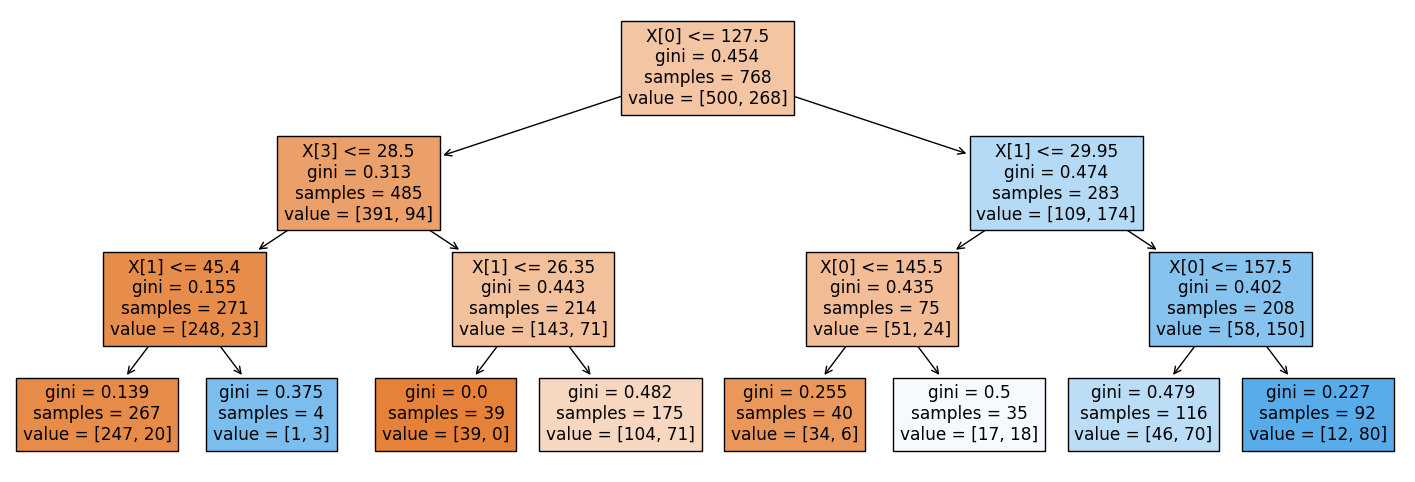

In [176]:
plot_tree(tree_clf,filled=True)

In [236]:
#istotność zmiennych
tree_clf.feature_importances_

array([0.619553  , 0.26093985, 0.        , 0.11950715, 0.        ])

In [237]:
y_pred_tree = tree_clf.predict(X_test[['Glucose', 'BMI', 'SkinThickness', 'Age', 'Pregnancies']])

In [238]:
tree_clf_pca = DecisionTreeClassifier(random_state=42)
tree_clf_pca.fit(X_train_pca, y_train)

y_pred_tree_pca = tree_clf_pca.predict(X_test_pca)

### Estymacja modelu klasyfikacyjnego - lasy losowe


In [239]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [240]:
y_pred_forest = rf_clf.predict(X_test)

In [241]:
rf_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_pca.fit(X_train_pca, y_train)

y_pred_forest_pca = rf_clf_pca.predict(X_test_pca)


### Ocena jakości modelu klasyfikacyjnego


In [242]:
print(confusion_matrix(y_test,y_pred_tree))
print(confusion_matrix(y_test,y_pred_tree_pca))

[[121  30]
 [ 30  50]]
[[104  47]
 [ 30  50]]


In [243]:
print(confusion_matrix(y_test,y_pred_forest))
print(confusion_matrix(y_test,y_pred_forest_pca))

[[115  36]
 [ 30  50]]
[[121  30]
 [ 25  55]]


In [246]:
print(classification_report(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree_pca))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       151
           1       0.52      0.62      0.56        80

    accuracy                           0.67       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.67      0.67       231



In [245]:
Scores = {'Accuracy':round(accuracy_score(y_test,y_pred_tree),3),
          'F1_score':round(f1_score(y_test,y_pred_tree),3),
          'Recall':round(recall_score(y_test,y_pred_tree),3),
          'Precision':round(precision_score(y_test,y_pred_tree),3)}
Scores

{'Accuracy': 0.74, 'F1_score': 0.625, 'Recall': 0.625, 'Precision': 0.625}

In [252]:
df_t=pd.DataFrame(data=Scores,index=['Model_DecisionTree'])
df_t

,Accuracy,F1_score,Recall,Precision
Model_DecisionTree,0.74,0.625,0.625,0.625


In [253]:
Scores_pca = {'Accuracy':round(accuracy_score(y_test,y_pred_tree_pca),3),
          'F1_score':round(f1_score(y_test,y_pred_tree_pca),3),
          'Recall':round(recall_score(y_test,y_pred_tree_pca),3),
          'Precision':round(precision_score(y_test,y_pred_tree_pca),3)}
Scores_pca

{'Accuracy': 0.667, 'F1_score': 0.565, 'Recall': 0.625, 'Precision': 0.515}

In [254]:
df_t_pca=pd.DataFrame(data=Scores_pca,index=['Model_DecisionTree_PCA'])
df_t_pca

,Accuracy,F1_score,Recall,Precision
Model_DecisionTree_PCA,0.667,0.565,0.625,0.515


In [251]:
print(classification_report(y_test,y_pred_forest))
print(classification_report(y_test,y_pred_forest_pca))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       151
           1       0.58      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       151
           1       0.65      0.69      0.67        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.76      0.76       231



In [255]:
ScoresForest = {'Accuracy':round(accuracy_score(y_test,y_pred_forest),3),
                'F1_score':round(f1_score(y_test,y_pred_forest),3),
                'Recall':round(recall_score(y_test,y_pred_forest),3),
                'Precision':round(precision_score(y_test,y_pred_forest),3)}
ScoresForest

{'Accuracy': 0.714, 'F1_score': 0.602, 'Recall': 0.625, 'Precision': 0.581}

In [256]:
df_rf=pd.DataFrame(data=ScoresForest,index=['Model_RandomFores'])
df_rf

,Accuracy,F1_score,Recall,Precision
Model_RandomFores,0.714,0.602,0.625,0.581


In [257]:
ScoresForest_pca = {'Accuracy':round(accuracy_score(y_test,y_pred_forest_pca),3),
                'F1_score':round(f1_score(y_test,y_pred_forest_pca),3),
                'Recall':round(recall_score(y_test,y_pred_forest_pca),3),
                'Precision':round(precision_score(y_test,y_pred_forest_pca),3)}
ScoresForest_pca

{'Accuracy': 0.762, 'F1_score': 0.667, 'Recall': 0.688, 'Precision': 0.647}

In [259]:
df_rf_pca=pd.DataFrame(data=ScoresForest_pca,index=['Model_RandomFores_PCA'])
df_rf_pca

,Accuracy,F1_score,Recall,Precision
Model_RandomFores_PCA,0.762,0.667,0.688,0.647


In [260]:
result = pd.concat([df_t,df_t_pca,df_rf, df_rf_pca])

In [261]:
result

,Accuracy,F1_score,Recall,Precision
Model_DecisionTree,0.740,0.625,0.625,0.625
Model_DecisionTree_PCA,0.667,0.565,0.625,0.515
Model_RandomFores,0.714,0.602,0.625,0.581
Model_RandomFores_PCA,0.762,0.667,0.688,0.647
